# Thermal Kamera MLX90640
**Produkt**: [MLX90640 Thermal Camera Breakout – Wide angle (110°)](https://shop.pimoroni.com/products/mlx90640-thermal-camera-breakout?variant=12549161746515)

**Datasheet**: MLX90640 [datasheet](https://www.melexis.com/-/media/files/documents/datasheets/mlx90640-datasheet-melexis.pdf) 24x32pixel

**GitHub**: https://github.com/pimoroni/mlx90640-library

In [3]:
# Benötigte libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [35]:
# Erstelle ein array welches alle 368 Temperaturmesswerte speichert
frame = np.zeros((24*32,))
array = np.zeros((24*32,))

In [15]:
type(array)
array.shape

(768,)

In [36]:
# Wähle das zentrale Pixel und setze den Wert auf 255
# ((rows/2)-1)*cols+(cols/2-1)
rows = 24
cols = 32
ind = int(((rows/2)-1)*cols+(cols/2-1))
cntrTemp = array[ind] 
array[ind] = 255
print(ind)


367


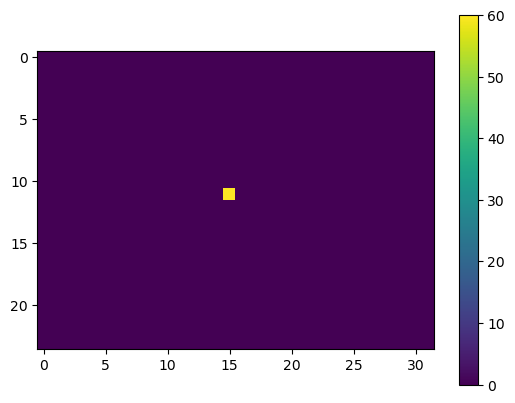

In [37]:
# plot array
plt.imshow(np.reshape(array,(24,32)),vmin=0,vmax=60)
plt.colorbar()
plt.show()

In [39]:
# Extrahiere die 2x2 zentralen Pixel und berechne den Mittelwert
# [11-12, 15-16]
# ol = (rows/2-1)*cols+cols/2
cols = 32
rows = 24
ol = int((rows/2-1)*cols+(cols/2-1))
ul = int((rows/2)*cols+(cols/2-1))
cntrTempAvg = np.mean(array[[ol,ol+1,ul,ul+1]])
# Überschreibe die mittleren 2x2 Pixel mit 255
array[[ol,ol+1,ul,ul+1]] = 255
print(cntrTempAvg)

63.75


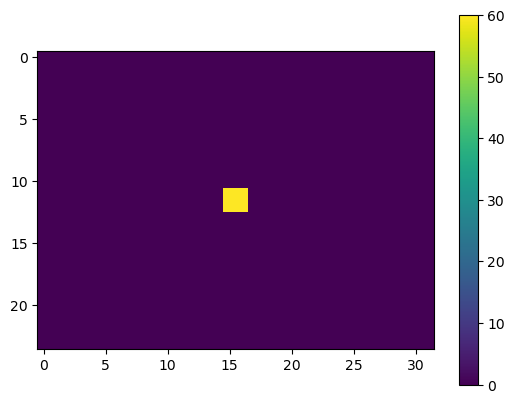

In [40]:
# plot array
plt.imshow(np.reshape(array,(24,32)),vmin=0,vmax=60)
plt.colorbar()
plt.show()

In [46]:
WIDTH = 240
HEIGHT = 240
img = Image.new('RGB', (WIDTH, HEIGHT), color=(0, 0, 0))
img = Image.frombytes("P", (32, 24), array)
img = img.convert("RGB")
img

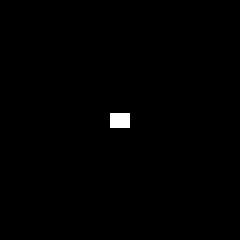

In [47]:
img = img.resize((240, 240), resample=Image.AFFINE)
img = img.rotate(-90)
img

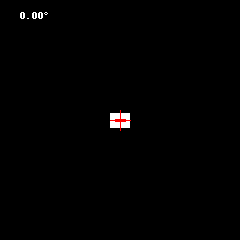

In [55]:

font = ImageFont.load_default()
draw = ImageDraw.Draw(img)
draw.text((20, 10), f"{cntrTemp:.2f}"+"°", font=font, fill=(255, 255, 255))
draw.line((110,120, 130, 120), fill=(255, 0, 0), width=1)
draw.line((120,110, 120, 130), fill=(255, 0, 0), width=1)
img      

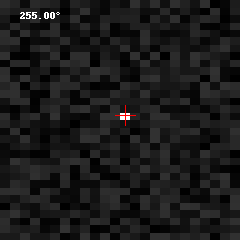

In [43]:
# kombiniert:
# Matrix erstellen, Werte auslesen und darstellen
frame = np.zeros((24*32,))
array = np.zeros((24*32,))
array = np.random.randint(0,50,(24*32,)) 
# zentraler Wert/Pixel auslesen
# ((rows/2)-1)*cols+(cols/2-1) # für gerade Werte
rows,cols = 24,32
indCntr = int(((rows/2)-1)*cols+(cols/2-1))
# Test: Überschreibe zentraler Wert mit 255
array[indCntr] = 255
cntrTemp = array[indCntr] 
# Mittelwert aus 2x2 Zentrum auslesen
ol = int((rows/2-1)*cols+(cols/2-1)) # index oben-links
ul = int((rows/2)*cols+(cols/2-1))   # index unten-links
# Test: Überschreibe die mittleren 2x2 Pixel mit 255
# array[[ol,ol+1,ul,ul+1]] = 255
cntrTempAvg = np.mean(array[[ol,ol+1,ul,ul+1]]) 
array = array.astype('uint8')    
        
# Erstelle ein Bild der Matrize
WIDTH = 240
HEIGHT = 180
img = Image.new('RGB', (WIDTH, HEIGHT), color=(0, 0, 0))
img = Image.frombytes("P", (32, 24), array)
img = img.convert("RGB")
img = img.resize((240, 240), resample=Image.AFFINE)
img = img.rotate(-90)

font = ImageFont.load_default()
draw = ImageDraw.Draw(img)
fillcolor = (255, 0, 0)
draw.text((20, 10), f"{cntrTemp:.2f}"+"°", font=font, fill=(255, 255, 255))
# cross for central temperature value
draw.line((115,115, 135, 115), fill=fillcolor, width=1)
draw.line((125,105, 125, 125), fill=fillcolor, width=1) 
# cross for 2x2 average temperature value
# draw.line((110,120, 130, 120), fill=fillcolor, width=1)
# draw.line((120,110, 120, 130), fill=fillcolor, width=1) 

#print(cntrTemp)
#print(cntrTempAvg)
img 

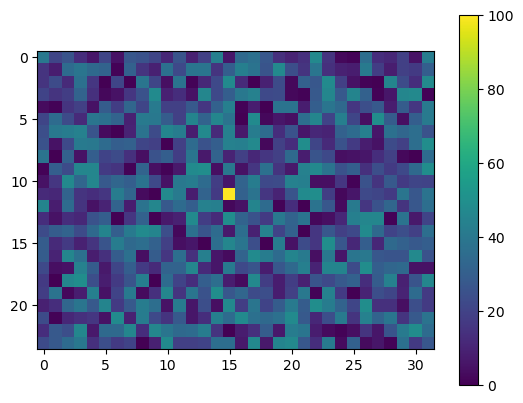

In [41]:
array[indCntr] = 100
# plot array
plt.imshow(np.reshape(array,(24,32)),vmin=0,vmax=100)
plt.colorbar()
plt.show()

In [32]:
array

array([ 23,  54,  18,  24,  30,  55,   7,  14,  44,  22,   8,  57,   6,
         6,  10,   2,  55,   7,  44,  54,  40,  28,  30,  30,   4,  59,
        33,  35,  58,  58,   7,  52,  12,  14,   7,  34,  40,  16,  14,
        18,  59,  32,  35,  12,  39,   5,  34,  39,  30,   9,  12,  43,
        39,  34,  12,  19,  35,  31,  22,  18,  52,  56,  11,   8,  20,
        19,  41,  36,   7,  19,  56,   0,  51,  54,   4,  41,  36,  16,
        30,  53,  39,  28,   7,  10,  29,  18,  45,   1,   5,  50,  44,
        17,   6,  51,  39,  36,  15,  40,   1,  14,  16,  13,   9,  58,
        54,  21,  57,  57,  37,  24,  53,  45,  54,  19,  58,  18,  23,
        27,   7,   4,  31,   0,   2,  22,  45,  29,  19,   7,  23,  23,
        23,   9,  10,  41,  52,  19,   8,  11,  31,  38,  39,  23,  56,
         5,  33,   0,  45,   3,  30,  52,  49,  19,  19,  20,  10,   7,
        41,   8,   9,   1,  45,  19,  57,  59,   1,  16,  31,   8,  50,
        22,  59,  22,  57,  24,  59,   4,  49,   3,  19,  59,  2